
# LGBM

In [16]:
import os

import lightgbm
import pandas as pd

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
ACTION_TRAIN_PATH = os.path.join('..', 'data', 'raw', 'action_train.csv')
PERSON_DATA_PATH = os.path.join('..', 'data', 'raw', 'person.csv')

RANDOM_STATE = 42

In [4]:
action_train = pd.read_csv(
    ACTION_TRAIN_PATH,
    index_col=0,
    parse_dates=['date'],
    dtype={
        'action_type': 'category',
        'char_1': 'category',
        'char_2': 'category',
        'char_3': 'category',
        'char_4': 'category',
        'char_5': 'category',
        'char_6': 'category',
        'char_7': 'category',
        'char_8': 'category',
        'char_9': 'category',
        'char_10': 'category',
    },
)

person_data = pd.read_csv(
    PERSON_DATA_PATH,
    index_col=0,
    parse_dates=['date'],
    dtype={
        'char_1': 'category',
        'char_2': 'category',
        'char_3': 'category',
        'char_4': 'category',
        'char_5': 'category',
        'char_6': 'category',
        'char_7': 'category',
        'char_8': 'category',
        'char_9': 'category',
    },
)

data = action_train.merge(person_data, how='left', on='person_id', suffixes=('_a', '_p'))

In [5]:
data.head()

,person_id,action_id,date_a,action_type,char_1_a,char_2_a,char_3_a,char_4_a,char_5_a,char_6_a,char_7_a,char_8_a,char_9_a,char_10_a,result,char_1_p,group_1,char_2_p,date_p,char_3_p,char_4_p,char_5_p,char_6_p,char_7_p,char_8_p,char_9_p,char_10_p,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36


In [6]:
X_train = data.drop(columns=['result', 'person_id', 'action_id', 'date_a', 'date_p', 'group_1'])
y_train = data['result']

In [7]:
X_train.head()

,action_type,char_1_a,char_2_a,char_3_a,char_4_a,char_5_a,char_6_a,char_7_a,char_8_a,char_9_a,char_10_a,char_1_p,char_2_p,char_3_p,char_4_p,char_5_p,char_6_p,char_7_p,char_8_p,char_9_p,char_10_p,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,type 2,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
1,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,type 2,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
2,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,type 2,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
3,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,type 2,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
4,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,type 2,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36


In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, random_state=RANDOM_STATE)

In [9]:
model = lightgbm.LGBMClassifier(
    objective='binary',
    random_state=RANDOM_STATE,
)

In [10]:
model.fit(X_train, y_train)

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 731623, number of negative: 916345
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.433503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2792
[LightGBM] [Info] Number of data points in the train set: 1647968, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.443955 -> initscore=-0.225128
[LightGBM] [Info] Start training from score -0.225128


LGBMClassifier(objective='binary', random_state=42)

In [11]:
y_proba = model.predict_proba(X_val)[:, 1]

In [12]:
# 0.5935891238737765
# 0.6792645630798142
# 0.6802787699046344
# 0.6821763727057384
# 0.6837800005757699
# 0.6841952899754038
# 0.6847508972155592
# 0.6847682958850906
# 0.6852066012383576
# 0.6855132091737249
# 0.686145139959022
# 0.9524116020575923
roc_auc_score(y_val, y_proba)

0.9524116020575923

In [15]:
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89    305449
           1       0.81      0.97      0.89    243874

    accuracy                           0.89    549323
   macro avg       0.89      0.90      0.89    549323
weighted avg       0.90      0.89      0.89    549323



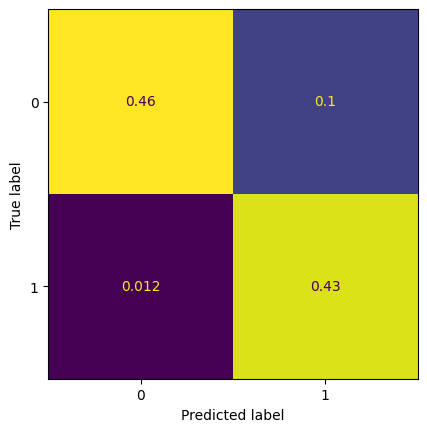

In [20]:
ax = ConfusionMatrixDisplay.from_predictions(y_val, y_pred, colorbar=False, normalize='all')